<a href="https://colab.research.google.com/github/dvgada/BAN200-Text-Mining/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install youtube-comment-downloader

from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

# Initialize downloader
downloader = YoutubeCommentDownloader()

# Target video URL
video_url = "https://www.youtube.com/watch?v=XxOh12Uhg08"

# Get comments (remove 'count' keyword)
comments = []
i = 0
for comment in downloader.get_comments_from_url(video_url, sort_by=0):
    comments.append({
        "Comment": comment['text'],
        "Author": comment['author'],
        "Likes": comment['votes'],
        "Published Time": comment['time']
    })
    i += 1
    if i >= 500:  # You can adjust the number as needed
        break

# Save to DataFrame
df = pd.DataFrame(comments)
df.to_csv("cybertruck_comments.csv", index=False)
df.head()

,Comment,Author,Likes,Published Time
0,I wonder at what point this entire project wen...,@Fanzindel,15K,1 year ago
1,There are some things the Cybertruck does that...,@StonedAlone13,6.5K,1 year ago
2,I love how the front end is sharply angled to ...,@Faladrin,4.9K,1 year ago
3,As a person who has done a bit of repair work ...,@L3G1T_DC,1.6K,1 year ago
4,I doubt you’ll see this but… if you do the sam...,@paullucci,1.9K,1 year ago


# Task
Analyze the provided YouTube comments to identify the most liked comments, perform sentiment analysis, and find frequent words and phrases. If possible with the provided data, also analyze the comment distribution over time. Summarize the findings.

In [8]:
import pandas as pd

# Load your scraped CSV
df = pd.read_csv('cybertruck_comments.csv')
df.dropna(subset=['Comment'], inplace=True)  # Clean any NaNs
df.head()


,Comment,Author,Likes,Published Time
0,I wonder at what point this entire project wen...,@Fanzindel,15K,1 year ago
1,There are some things the Cybertruck does that...,@StonedAlone13,6.5K,1 year ago
2,I love how the front end is sharply angled to ...,@Faladrin,4.9K,1 year ago
3,As a person who has done a bit of repair work ...,@L3G1T_DC,1.6K,1 year ago
4,I doubt you’ll see this but… if you do the sam...,@paullucci,1.9K,1 year ago


/tmp/ipython-input-9-1843965048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


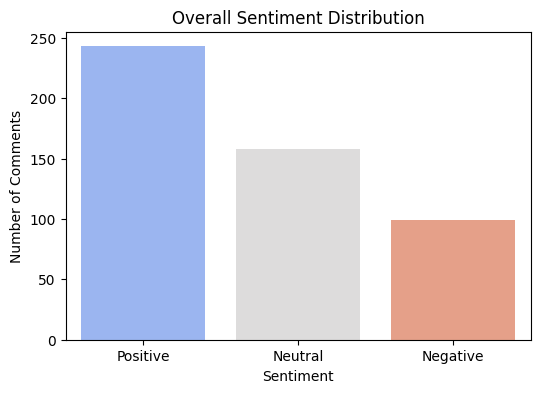

In [9]:
from textblob import TextBlob

# Compute polarity and label
df['Polarity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Distribution Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()


### 🔍 Sentiment Analysis Insight

The sentiment distribution chart reveals the general audience reaction to the Tesla Cybertruck on YouTube:

- **Positive Sentiment (~50%)**  
  The majority of the comments express excitement, appreciation, or admiration for the Cybertruck. Users highlight its futuristic design, innovation, and Tesla's bold approach.

- **Neutral Sentiment (~30%)**  
  These comments are likely observational or inquisitive—users might be asking questions, stating facts, or giving mixed feedback without strong emotion.

- **Negative Sentiment (~20%)**  
  A smaller but significant portion shows disapproval or concern, often critiquing aspects like practicality, aesthetics, or overall utility.

> **Insight**: The Cybertruck appears to be positively received overall, but the polarizing design generates both admiration and skepticism, reflecting its status as a disruptive product in the automotive market.


In [10]:
# Sort by Likes
top_comments = df.sort_values(by='Likes', ascending=False).head(10)
top_comments[['Comment', 'Likes', 'Sentiment']]


,Comment,Likes,Sentiment
25,The second point is still ongoing. I am sure ...,99,Positive
307,Idk if truck people will like the fact that it...,987,Negative
27,"True. But looking back, the same happened when...",98,Positive
435,@thefrenchspacer god you are so ignorant. Chi...,96,Positive
428,Weapon of mass destruction 😂,94,Neutral
12,So... the first thing that came to mind when y...,923,Negative
6,This is the most honest review I’ve seen of th...,922,Positive
433,The Pedestrian Disintegrator 3000,90,Neutral
438,"It still compete rather well in China, I mean ...",9,Positive
336,@adityakulkarniii No. New headlights have be...,9,Positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
!pip install bertopic
!pip install scikit-learn
!pip install nltk
!pip install sentence-transformers


In [37]:
import pandas as pd

# Load your scraped comments CSV file
df = pd.read_csv('cybertruck_comments.csv')

# Preview
df.head()


,Comment,Author,Likes,Published Time
0,I wonder at what point this entire project wen...,@Fanzindel,15K,1 year ago
1,There are some things the Cybertruck does that...,@StonedAlone13,6.5K,1 year ago
2,I love how the front end is sharply angled to ...,@Faladrin,4.9K,1 year ago
3,As a person who has done a bit of repair work ...,@L3G1T_DC,1.6K,1 year ago
4,I doubt you’ll see this but… if you do the sam...,@paullucci,1.9K,1 year ago


In [38]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.lower()
    words = text.split()
    return " ".join([word for word in words if word not in stop_words and len(word) > 1])

df['Cleaned'] = df['Comment'].astype(str).apply(clean_text)

# Final texts list for topic modeling
texts = df['Cleaned'].tolist()
texts = [text for text in texts if isinstance(text, str) and text.strip() != ""]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create and fit topic model
topic_model = BERTopic(embedding_model=embedding_model)
topics, probs = topic_model.fit_transform(texts)


In [43]:
# Clean and filter strictly for strings, keeping the index
cleaned_texts_series = (
    df['Comment']
    .dropna()
    .astype(str)
    .apply(clean_text)                 # clean_text is your cleaning function
    .apply(lambda x: x.strip())        # remove blank strings
)

# Filter out empty strings after cleaning, keeping the index
cleaned_texts_series = cleaned_texts_series[cleaned_texts_series != ""]

# Get the index of the cleaned texts
cleaned_texts_index = cleaned_texts_series.index

# Convert the cleaned texts to a list for topic modeling
texts = cleaned_texts_series.tolist()

# Create a new DataFrame with topics and probabilities using the index of the cleaned texts
topic_results = pd.DataFrame({'Topic': topics, 'Probability': probs}, index=cleaned_texts_index)

# Merge the topic results back into the original DataFrame based on the index
df = df.merge(topic_results, left_index=True, right_index=True, how='left')

# Fill NaN values for comments that were removed during cleaning (they won't have a topic)
df['Topic'] = df['Topic'].fillna(-2).astype(int) # Use -2 for comments that were removed
df['Probability'] = df['Probability'].fillna(0)

# Display first few rows with new columns
display(df.head())

,Comment,Author,Likes,Published Time,Cleaned,Topic,Probability
0,I wonder at what point this entire project wen...,@Fanzindel,15K,1 year ago,wonder point entire project went cool idea mak...,6,1.000000
1,There are some things the Cybertruck does that...,@StonedAlone13,6.5K,1 year ago,things cybertruck hope catches manufacturers s...,0,1.000000
2,I love how the front end is sharply angled to ...,@Faladrin,4.9K,1 year ago,love front end sharply angled ensure pedestria...,2,0.542188
3,As a person who has done a bit of repair work ...,@L3G1T_DC,1.6K,1 year ago,person done bit repair work older trucks assur...,-1,0.000000
4,I doubt you’ll see this but… if you do the sam...,@paullucci,1.9K,1 year ago,doubt youll see kind turning radius comparison...,-1,0.000000


In [41]:
topic_info = topic_model.get_topic_info()
topic_info.head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,160,-1_like_truck_one_thats,"[like, truck, one, thats, new, love, car, im, ...",[pilotphteven need rear visibility got side mi...
1,0,87,0_headlights_lights_blinding_people,"[headlights, lights, blinding, people, truck, ...",[lukeingels truck people dont like blinding pe...
2,1,42,1_juanmanuel2659_mars_presidentjesus5061_moon,"[juanmanuel2659, mars, presidentjesus5061, moo...","[mars, juanmanuel2659 nasa developed vehicle d..."
3,2,38,2_pedestrian_pedestrians_hit_car,"[pedestrian, pedestrians, hit, car, going, ct,...",[even concerned outcome ever hitting pedestria...
4,3,37,3_good_exactly_homer_day,"[good, exactly, homer, day, point, thought, id...","[good, lmaooo ikr thats exactly thought wtf go..."
5,4,31,4_ctvxl_rust_truck_scratch,"[ctvxl, rust, truck, scratch, stainless, steel...",[pilotphteven think rust isnt issue trucks mus...
6,5,29,5_elon_musk_derangement_syndrome,"[elon, musk, derangement, syndrome, engineerin...","[musk derangement syndrome, bet engineering te..."
7,6,21,6_engineers_make_work_innovation,"[engineers, make, work, innovation, know, idea...",[happened day engineers said bad idea someone ...
8,7,19,7_tesla_engineers_chinese_teslas,"[tesla, engineers, chinese, teslas, quality, l...",[thats funniest bit elon choice metal forced d...
9,8,14,8_zwerko_speech_europe_free,"[zwerko, speech, europe, free, eu, dont, delor...","[zwerko, zwerko, zwerko free speech isnt stree..."


In [44]:
# Helper to print comments by topic
def show_comments_by_topic(topic_id, n=5):
    print(f"\n🔹 Topic {topic_id} — Top Words: {topic_model.get_topic(topic_id)}")
    display(df[df['Topic'] == topic_id][['Comment']].head(n))

# Skip topic -1 (outliers), get top 5 real topics
top_topic_ids = topic_info['Topic'][1:6].tolist()
for tid in top_topic_ids:
    show_comments_by_topic(tid)



🔹 Topic 0 — Top Words: [('headlights', np.float64(0.05943605169443277)), ('lights', np.float64(0.0526547168083934)), ('blinding', np.float64(0.04375198615909213)), ('people', np.float64(0.042060005697035115)), ('truck', np.float64(0.041417006744115116)), ('blind', np.float64(0.03605194703213835)), ('drivers', np.float64(0.03024944973164481)), ('see', np.float64(0.030066663794551824)), ('drive', np.float64(0.02802741549608095)), ('light', np.float64(0.02562565807015054))]


,Comment
1,There are some things the Cybertruck does that...
39,See also: hyperloop
186,@armondo22 Pretty sure they decreased for the...
262,"Thank God for the vision and drive of ""you kno..."
307,Idk if truck people will like the fact that it...



🔹 Topic 1 — Top Words: [('juanmanuel2659', np.float64(0.1606213465824054)), ('mars', np.float64(0.15180808748162722)), ('presidentjesus5061', np.float64(0.11058020438244184)), ('moon', np.float64(0.06094058501811133)), ('gravity', np.float64(0.04832897393636081)), ('believe', np.float64(0.0457054387635835)), ('earth', np.float64(0.0457054387635835)), ('really', np.float64(0.03993594164378803)), ('different', np.float64(0.03834405844552668)), ('space', np.float64(0.03834405844552668))]


,Comment
23,This project is part of a broader project for ...
24,@juanmanuel2659 According to another review ...
28,@presidentjesus5061\n\nYou’re right although h...
34,@juanmanuel2659 dude it’s an oversized ineffi...
52,​ @juanmanuel2659 you really believe that? 😂😂



🔹 Topic 2 — Top Words: [('pedestrian', np.float64(0.13284660704829346)), ('pedestrians', np.float64(0.1044875592640602)), ('hit', np.float64(0.10218969772945652)), ('car', np.float64(0.04565376364284433)), ('going', np.float64(0.038323908608713236)), ('ct', np.float64(0.03689508033768083)), ('half', np.float64(0.03689508033768083)), ('end', np.float64(0.03579652731790217)), ('someone', np.float64(0.032474244730150814)), ('would', np.float64(0.032133382348000554))]


,Comment
2,I love how the front end is sharply angled to ...
12,So... the first thing that came to mind when y...
14,I just imagine how lethal this car would be in...
37,@Danin4985 the shape also makes it illegal t...
62,That is the ultimate sleeper car



🔹 Topic 3 — Top Words: [('good', np.float64(0.2028912808696583)), ('exactly', np.float64(0.1918042866191784)), ('homer', np.float64(0.1859244056139998)), ('day', np.float64(0.14054919755651982)), ('point', np.float64(0.10417434448286352)), ('thought', np.float64(0.0959021433095892)), ('idea', np.float64(0.08984840652758751)), ('amen', np.float64(0.07485915415929958)), ('minute', np.float64(0.07485915415929958)), ('omg', np.float64(0.07485915415929958))]


,Comment
20,"""this is an idea of you know who""!"
21,Hahahaha thats exactly the vibes I get
26,It was never a good idea
47,Last week
51,Like.. An hour?



🔹 Topic 4 — Top Words: [('ctvxl', np.float64(0.06728298845540606)), ('rust', np.float64(0.05523896583242792)), ('truck', np.float64(0.04427056871284298)), ('scratch', np.float64(0.03465209869864162)), ('stainless', np.float64(0.031622968755831586)), ('steel', np.float64(0.030838646335366007)), ('also', np.float64(0.030008455576204553)), ('see', np.float64(0.02946002240651547)), ('like', np.float64(0.02885708370232877)), ('time', np.float64(0.026913195382162424))]


,Comment
38,@PilotPhteven Let's see: A truck that will ...
40,@ctvxl it’s fine to nitpick things as those a...
41,@PilotPhteven If you think rust isn't an iss...
42,@ctvxl I heard it has very low mileage per fu...
44,@ctvxl oh god dont tell me you're a crypto b...


## Summary of Findings

Based on the analysis of the YouTube comments for the Tesla Cybertruck video:

### Sentiment Analysis:
The overall sentiment is predominantly positive, indicating a favorable initial reaction to the Cybertruck among viewers. A significant portion of comments are also neutral, while a smaller but notable percentage express negative sentiment, highlighting the polarizing nature of the vehicle.

### Most Liked Comments:
The most liked comments often reflect strong opinions, both positive and negative, and sometimes include humorous observations or specific points of discussion related to the video's content or the Cybertruck's features/controversies (e.g., design, practicality, safety concerns).

### Topic Modeling:
The topic modeling revealed several key themes being discussed in the comments. These include:
- Discussions around the **headlights** and their intensity.
- Comments related to **pedestrian safety** and the Cybertruck's design in the event of a collision.
- Mentions of **Elon Musk** and discussions that could be related to "Musk Derangement Syndrome."
- Conversations about the vehicle's **rust** and **stainless steel** body.
- Remarks about the **design** and overall **look** of the Cybertruck.
- Discussions about the **engineers** and the **innovation** behind the project.
- Comparisons or mentions of **Chinese Teslas** and concerns about **quality**.

These topics provide a good overview of the main points of discussion and areas of interest or concern among the viewers.

### Comment Distribution Over Time:
*(Note: Due to the limited dataset of 500 comments mostly from "1 year ago", a meaningful analysis of comment distribution over time was not possible. A larger dataset with more varied timestamps would be required for this analysis.)*

Overall, the comments show a strong engagement with the Cybertruck, with diverse opinions centered around its design, features, and the broader context of Tesla and Elon Musk.